Title: Spherical NFW simuleted data
    
Date: 08/03/2020

Obj: Simulate a source galaxy and deflect it using an Spherical NFW mass model.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt
print(al.__version__)

1.1.4


In [191]:
#Defing the grid
grid = al.Grid.uniform(shape_2d=(150, 150), pixel_scales=0.1, sub_size=2)
psf = al.Kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)

In [304]:
#Defing the mass model
NFW_profile = al.mp.EllipticalNFW(centre=(0.0, 0.0),
                                  kappa_s=3., 
                                  scale_radius=0.5, 
                                  elliptical_comps=(0.0, -0.1111), 
                                  )
lens_galaxy = al.Galaxy(
    redshift=0.035,
    mass=NFW_profile,
)

print(lens_galaxy)

Redshift: 0.035
Mass Profiles:
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, -0.1111)
axis_ratio: 0.8000180001800018
phi: 90.0
kappa_s: 3.0
scale_radius: 0.5
inner_slope: 1.0


In [333]:
#Defining the lens model
light1 = al.lp.EllipticalExponential(
        centre=(0.0, 0.0),
        elliptical_comps=(0.211111, 0.0),
        intensity=1.0,
        effective_radius=1.0,
    )

source_galaxy = al.Galaxy(
    redshift=2.1,
    light_1=light1,
     
)

print(source_galaxy)

Redshift: 2.1
Light Profiles:
EllipticalExponential
centre: (0.0, 0.0)
elliptical_comps: (0.211111, 0.0)
axis_ratio: 0.6513762982914034
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0


In [334]:
#Ray tracing the source galaxy
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

In [335]:
mask = al.Mask.circular(
    shape_2d=grid.shape_2d, pixel_scales=grid.pixel_scales, sub_size=1,radius=2.0 ,centre=(0, 0)
)

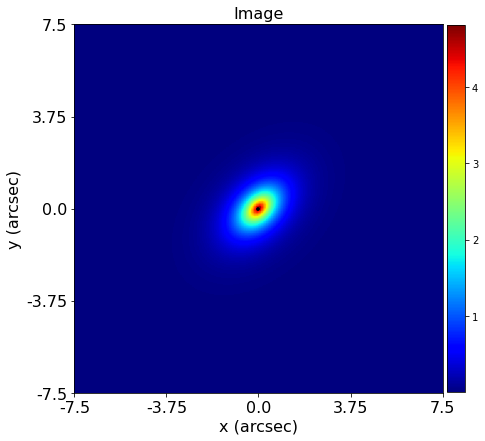

In [336]:
#Save image of source galaxy and plot it
plotter = aplt.Plotter(output=aplt.Output(path='/home/carlos/autolens_workspace/howtolens/Testes with MGE/Elliptical NFW/Image Output/',
                                          filename='Source Galaxy',
                                           format='png'),
                       labels=aplt.Labels(title='Source Galaxy'),             
                      )

aplt.Galaxy.image(galaxy=source_galaxy, grid=grid, 
                  plotter=plotter)
aplt.Galaxy.image(galaxy=source_galaxy, grid=grid)

/home/carlos/anaconda3/lib/python3.7/site-packages/autogalaxy/profiles/mass_profiles/dark_mass_profiles.py:1307: UserWarning: [pyquad] Exceeded max number of iterations.
  args=(npow, self.axis_ratio, self.scale_radius),
/home/carlos/anaconda3/lib/python3.7/site-packages/autogalaxy/profiles/mass_profiles/dark_mass_profiles.py:1307: UserWarning: [pyquad] Exceeded max number of iterations.
  args=(npow, self.axis_ratio, self.scale_radius),


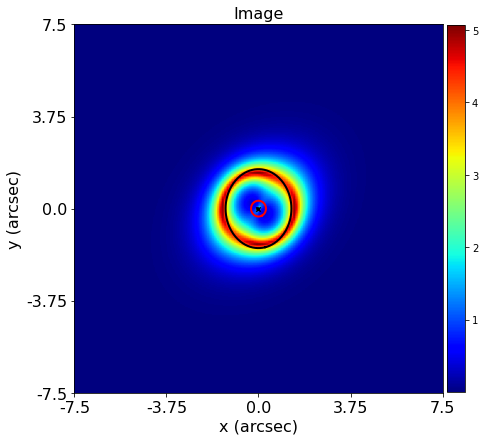

In [338]:
#Save image of arcs and plot it
plotter = aplt.Plotter(output=aplt.Output(path='/home/carlos/autolens_workspace/howtolens/Testes with MGE/Elliptical NFW/Image Output/',
                                          filename='Arcs',
                                           format='png'),
                       labels=aplt.Labels(title='Arcs'),             
                      )
aplt.Tracer.image(tracer=tracer, grid=grid, plotter=plotter)
aplt.Tracer.image(tracer=tracer, grid=grid)

In [339]:
#Just some infos about shape of the image after convolution with PSF
normal_image = tracer.image_from_grid(grid=grid)
padded_image = tracer.padded_image_from_grid_and_psf_shape(
    grid=grid, psf_shape_2d=psf.shape_2d
)
print(normal_image.shape)
print(padded_image.shape)

(90000,)
(102400,)


In [340]:
#Simulating the arcs image: Add Noise and PSF
simulator = al.SimulatorImaging(
    exposure_time_map=al.Array.full(fill_value=300.0, shape_2d=grid.shape_2d),
    psf=psf,
    background_sky_map=al.Array.full(fill_value=0.1, shape_2d=grid.shape_2d),
    add_noise=True,
)

imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

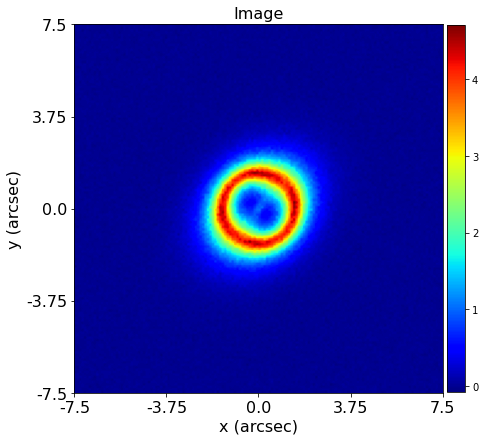

In [341]:
#Plot simulated image and save it
plotter = aplt.Plotter(output=aplt.Output(path='/home/carlos/autolens_workspace/howtolens/Testes with MGE/Elliptical NFW/Image Output/',
                                          filename='Simulated Arcs',
                                           format='png'),
                       labels=aplt.Labels(title='Arcs with Noise and PSF'),             
                      )
aplt.Imaging.image(imaging=imaging, plotter=plotter)
aplt.Imaging.image(imaging=imaging)

In [342]:
from pyprojroot import here

workspace_path = str(here())
dataset_path = f"{workspace_path}/howtolens/Testes with MGE/Elliptical NFW/Data"
print("Dataset Path: ", dataset_path)

Dataset Path:  /home/carlos/autolens_workspace/howtolens/Testes with MGE/Elliptical NFW/Data


In [343]:
#Save the simulated image in .fits file
imaging.output_to_fits(
    image_path=f"{dataset_path}/ImageNFW.fits",
    noise_map_path=f"{dataset_path}/NoiseNFW.fits",
    psf_path=f"{dataset_path}/PSFNFW.fits",
    overwrite=True,
)